## Importing relevant libraries

In [1]:
import pandas as pd # data processing
import seaborn as sns
import numpy as np # linear algebra

import matplotlib 
import matplotlib.pyplot as plt # for visualizing data
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # to adjust the configuration of plot

## Data loading and Exploration

In [2]:
# importing, reading the dataset, creating dataframe and making a copy 

movies = pd.read_csv('movies.csv')
df = movies.copy()

In [3]:
# taking a overlook at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Overview of the dataset

In [4]:
# obtaining the summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
# randomly selecting 10 rows from the DataFrame, using a fixed random seed (random_state = 55)

df.sample(10, random_state=55)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3133,Bean,PG-13,Adventure,1997,"November 7, 1997 (United States)",6.5,100000.0,Mel Smith,Rowan Atkinson,Rowan Atkinson,United Kingdom,18000000.0,2.512127e+08,Polygram Filmed Entertainment,89.0
6747,Irrational Man,R,Comedy,2015,"August 7, 2015 (United States)",6.6,60000.0,Woody Allen,Woody Allen,Joaquin Phoenix,United States,11000000.0,2.739108e+07,Gravier Productions,95.0
1336,Monkey Shines,R,Drama,1988,"July 29, 1988 (United States)",6.2,11000.0,George A. Romero,Michael Stewart,Jason Beghe,United States,7000000.0,5.344577e+06,Orion Pictures,113.0
6343,The Heat,R,Action,2013,"June 28, 2013 (United States)",6.6,165000.0,Paul Feig,Katie Dippold,Sandra Bullock,United States,43000000.0,2.299308e+08,Twentieth Century Fox,117.0
6846,Captain America: Civil War,PG-13,Action,2016,"May 6, 2016 (United States)",7.8,694000.0,Anthony Russo,Christopher Markus,Chris Evans,United States,250000000.0,1.153337e+09,Marvel Studios,147.0
5774,All Good Things,R,Crime,2010,"December 3, 2010 (Canada)",6.3,54000.0,Andrew Jarecki,Marcus Hinchey,Ryan Gosling,United States,NaN,1.754389e+06,Groundswell Productions,101.0
4699,Lord of War,R,Action,2005,"September 16, 2005 (United States)",7.6,300000.0,Andrew Niccol,Andrew Niccol,Nicolas Cage,France,50000000.0,7.261707e+07,Entertainment Manufacturing Company,122.0
277,The Final Option,R,Action,1982,"September 16, 1983 (United States)",6.4,3000.0,Ian Sharp,George Markstein,Lewis Collins,Switzerland,6000000.0,2.666873e+06,Richmond Light Horse Productions,125.0
2395,Mr. Nanny,PG,Action,1993,"October 8, 1993 (United States)",3.8,8900.0,Michael Gottlieb,Edward Rugoff,Hulk Hogan,United States,10000000.0,4.348572e+06,New Line Cinema,84.0
7022,Sanam Teri Kasam,Not Rated,Drama,2016,"February 5, 2016 (India)",7.5,11000.0,Radhika Rao,Radhika Rao,Harshvardhan Rane,India,NaN,1.386707e+06,Jhoom Jhoom Productions,154.0


## Data Cleaning and Preprocessing

### Checking for missing values

In [6]:
# calculating the percentage of missing values in each column

(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

budget      28.312467
gross        2.464789
rating       1.004173
company      0.221701
runtime      0.052165
score        0.039124
votes        0.039124
writer       0.039124
country      0.039124
released     0.026082
star         0.013041
name         0.000000
genre        0.000000
year         0.000000
director     0.000000
dtype: float64

In [7]:
# this will return a pandas series of column names along with the sum of missing values in each column

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
# replacing the numerical columns 'gross', 'budget', 'score', votes and 'runtime' missing values with mean

mean_budget = df['budget'].mean()
mean_gross = df['gross'].mean()
mean_score = df['score'].mean()
mean_votes = df['votes'].mean()
mean_runtime = df['runtime'].mean()

df['budget'].fillna(value = mean_budget, inplace = True)
df['gross'].fillna(value = mean_gross, inplace = True)
df['score'].fillna(value = mean_score, inplace = True)
df['votes'].fillna(value = mean_votes, inplace = True)
df['runtime'].fillna(value = mean_runtime, inplace = True)

In [9]:
# now, we have very less rows with missing values, and which cannot we can not impute with other values.
# to avoid inaccuracy, drop the remaining rows with missing values

df.dropna(inplace = True)

In [10]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

### filling missing values in 'budget' and 'gross' columns with zero

df['budget'].fillna(0, inplace = True)
df['gross'].fillna(0, inplace = True)

### Converting data types and fixing the year

In [11]:
# converting the 'budget' and 'gross' columns to integers

df['budget'] = df['budget'].astype("int64")
df['gross'] = df['gross'].astype("int64")
df['votes'] = df['votes'].astype("int64")
df['runtime'] = df['runtime'].astype("int64")


In [12]:
# There are several mismatches in year and year released. To fix this we create new column based on year released data

df['year_fix'] = df['released'].astype('str').str.extract('(\d{4})')

In [13]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_fix
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [14]:
# randomly selecting 10 rows from the DataFrame, using a fixed random seed (random_state = 55)

df.sample(10, random_state=55)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_fix
630,Mass Appeal,PG,Drama,1984,"December 14, 1984 (United States)",6.6,952,Glenn Jordan,Bill C. Davis,Jack Lemmon,United States,35589876,1945658,David Foster Productions,99,1984
1179,A Prayer for the Dying,R,Action,1987,"September 11, 1987 (United States)",6.3,4800,Mike Hodges,Jack Higgins,Mickey Rourke,United Kingdom,6000000,1432687,The Samuel Goldwyn Company,107,1987
4670,Assault on Precinct 13,R,Action,2005,"January 19, 2005 (United States)",6.3,75000,Jean-François Richet,John Carpenter,Ethan Hawke,France,30000000,35294470,Rogue Pictures,109,2005
896,The Hitcher,R,Action,1986,"February 21, 1986 (United States)",7.2,45000,Robert Harmon,Eric Red,Rutger Hauer,United States,6000000,5844868,HBO Pictures,97,1986
1549,Fat Man and Little Boy,PG-13,Biography,1989,"October 20, 1989 (United States)",6.5,7200,Roland Joffé,Bruce Robinson,Paul Newman,United States,30000000,3563162,Paramount Pictures,127,1989
3429,Sour Grapes,R,Comedy,1998,"April 17, 1998 (United States)",5.8,2700,Larry David,Larry David,Steven Weber,United States,35589876,123104,Castle Rock Entertainment,91,1998
1258,Mississippi Burning,R,Crime,1988,"January 27, 1989 (United States)",7.8,91000,Alan Parker,Chris Gerolmo,Gene Hackman,United States,15000000,34603943,Orion Pictures,128,1989
2426,House of Cards,PG-13,Drama,1993,"June 25, 1993 (United States)",6.2,2600,Michael Lessac,Michael Lessac,Kathleen Turner,Italy,35589876,322871,A&M Films,109,1993
5195,Persepolis,PG-13,Animation,2007,"February 22, 2008 (United States)",8.0,90000,Vincent Paronnaud,Marjane Satrapi,Chiara Mastroianni,France,7300000,22783978,2.4.7. Films,96,2008
6234,"For a Good Time, Call...",R,Comedy,2012,"November 2, 2012 (United Kingdom)",6.0,16000,Jamie Travis,Katie Anne Naylon,Ari Graynor,United States,850000,1386088,AdScott Pictures,85,2012


• As we can see the NaN values which were observed in Out[5] are now replaced by '0' and also for the movie 'The Final Action' year is corrected in the new column created

In [15]:
# checking duplicates

df.duplicated().sum()

0

## The data has been cleaned, now let's explore it

In [16]:
# sorting values by 'gross' column

df.sort_values(by=['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_fix
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6.1,2900,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,35589876,1672,Polygram Filmed Entertainment,87,1998
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,35589876,1605,Balboa Entertainment,110,1996
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103,2001
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93,2020


## Correlation

### Let's see the correlation between Budget and Gross revenue

#### Correlation: A statistical measure that describes the relationship between two variables, and the direction and strength of that relationship 

•Pearson Correlation Coefficient: It measures the linear relationship between two continous variables. The value ranges from -1 to +1. 1 indicates posititve correlation, 0 indicates no correlation adn -1 indicates negative correlation. 

•We will be focussing on highest correlation with gross earning. We'll use pearson method and create correlation matrix, and subsequent visualization

In [18]:
# correlation Matrix between all numeric columns

correlation_matrix = df.corr(numeric_only = True, method = 'pearson')
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.102154,0.226789,0.268848,0.254159,0.120808
score,0.102154,1.000000,0.411938,0.064654,0.185084,0.400529
votes,0.226789,0.411938,1.000000,0.421218,0.629325,0.309353
budget,0.268848,0.064654,0.421218,1.000000,0.712561,0.265933
gross,0.254159,0.185084,0.629325,0.712561,1.000000,0.241619
runtime,0.120808,0.400529,0.309353,0.265933,0.241619,1.000000


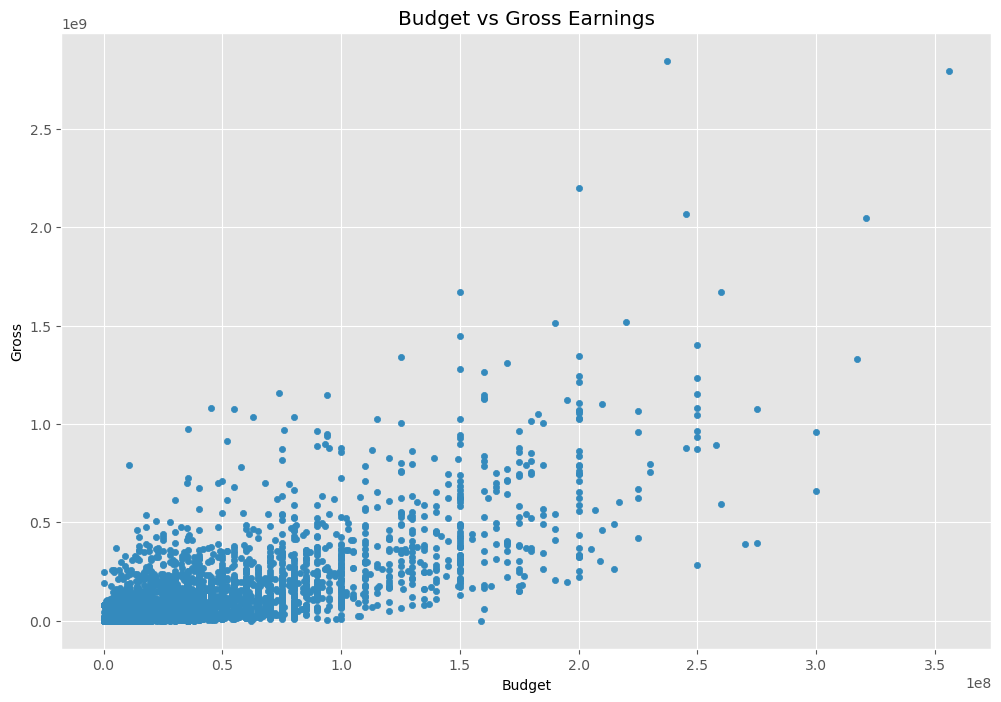

In [17]:
# creating a scatter chart 'budget' vs 'gross'

df.plot.scatter(x='budget' ,y='gross')

# setting chart titles and labels

plt.title("Budget vs Gross Earnings")

plt.xlabel("Budget")

plt.ylabel("Gross")

# show the chart

plt.show()

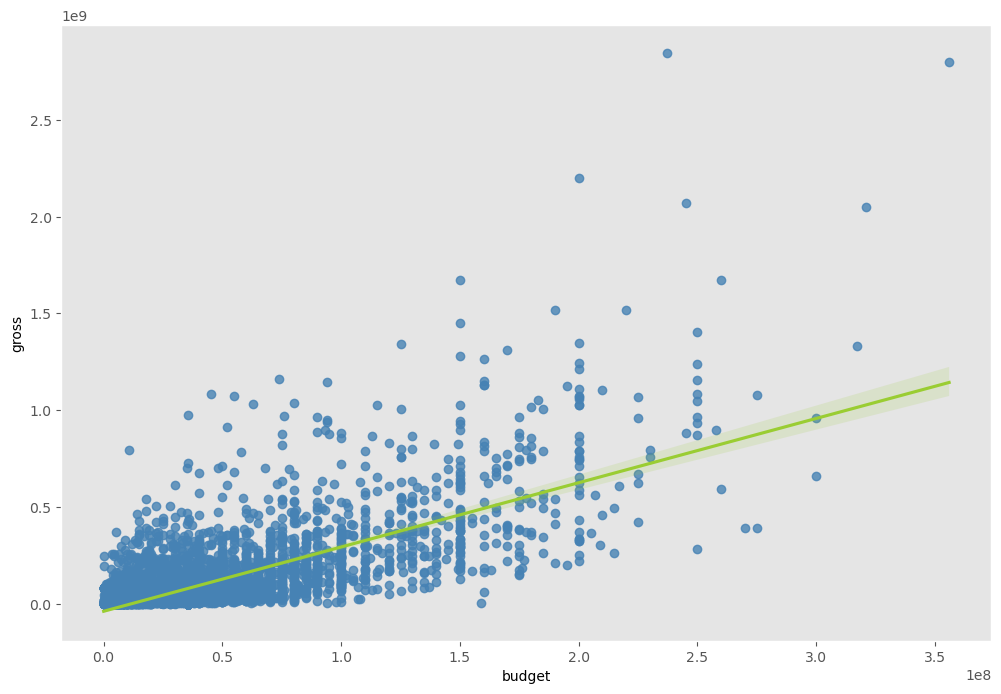

In [19]:
# We can further analyze the correlation using regplot function of seaborn library.

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'steelblue'},line_kws={'color':'yellowgreen'})

plt.grid(False)

plt.show()

• The regression plot above depicts the positive correlation between budget and gross earnings.
• The blue scatter points represent individual movies
• Regression line represents a trend that higher budgets lead to greater gross earnings

#### Higher budget leads to higher gross earnings

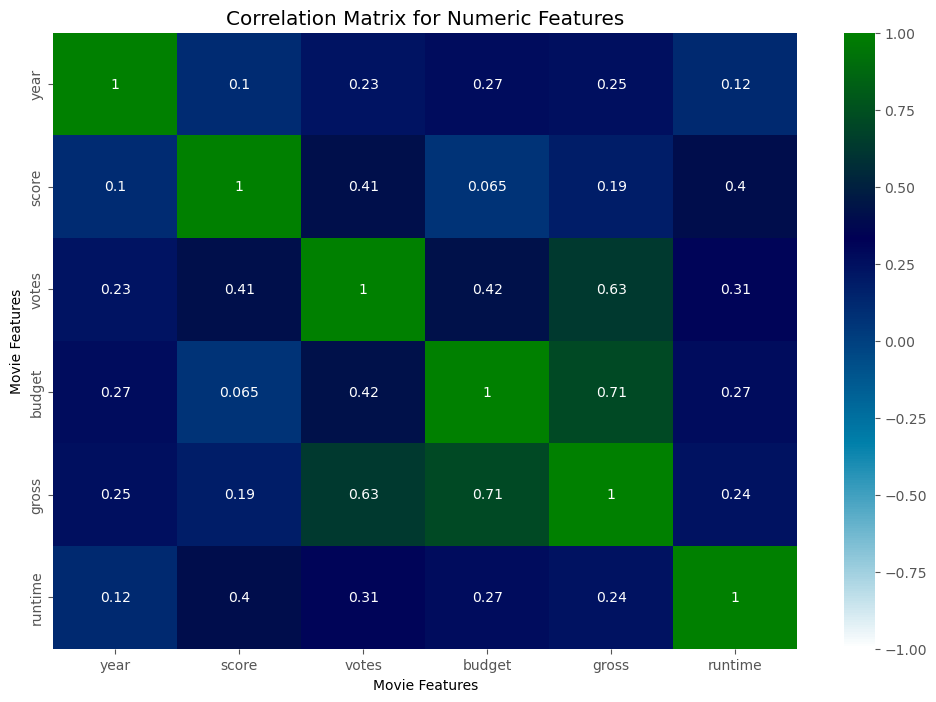

In [39]:
correlation_matrix = df.corr(method = 'pearson', numeric_only = True)

sns.heatmap(correlation_matrix, cmap='ocean_r', annot=True, vmin=-1, vmax=1, center = 0)

plt.title("Correlation Matrix for Numeric Features")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")

plt.show()

### Higher coefficient implies higher correlation
From the heatmap, we can clearly see the higher correlation between:

#### • budget and gross

#### • votes and gross

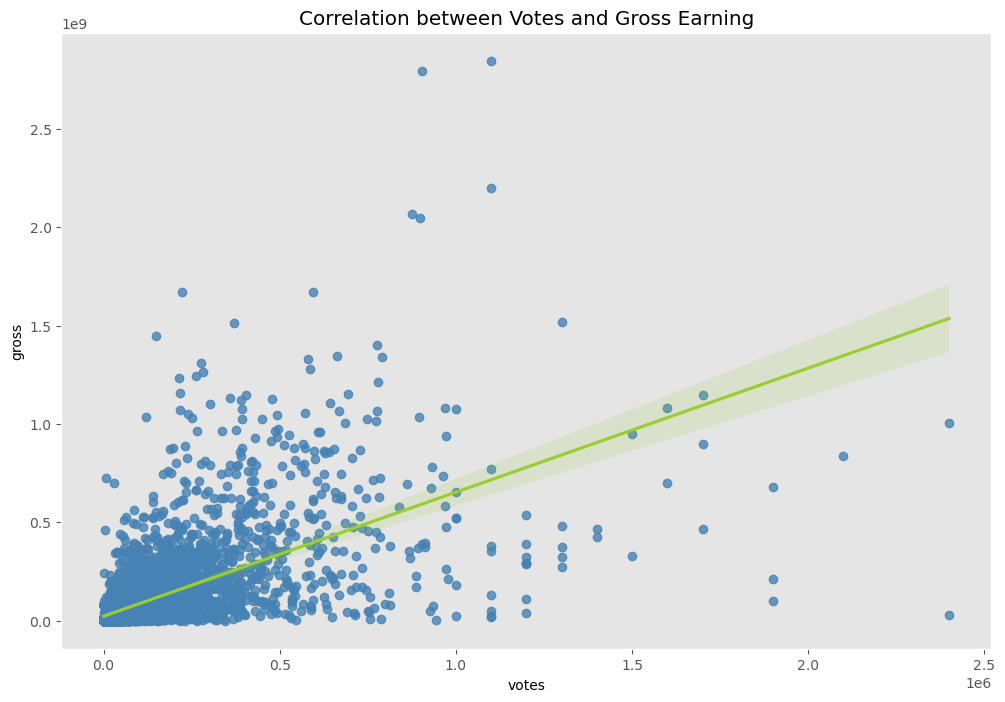

In [22]:
# correlation between Votes and Gross Earnings

sns.regplot(x='votes', y='gross', data=df, scatter_kws={'color':'steelblue'},line_kws={'color':'yellowgreen'})

plt.title("Correlation between Votes and Gross Revenue")

plt.grid(False)

plt.show()

• The regression plot above depicts the positive correlation between votes and gross earnings.

• The light green scatter points represent individual movies.

• Regression line represents a trend that more votes means greater gross earnings.

#### More Votes Indicates Higher Gross Earnings

In [23]:
# Displaying pairs having correlation greater than 0.5

correlation_pairs = correlation_matrix.unstack()
correlation_pairs.sort_values()[correlation_pairs.sort_values() > 0.5]

gross    votes      0.629325
votes    gross      0.629325
budget   gross      0.712561
gross    budget     0.712561
year     year       1.000000
budget   budget     1.000000
votes    votes      1.000000
score    score      1.000000
gross    gross      1.000000
runtime  runtime    1.000000
dtype: float64

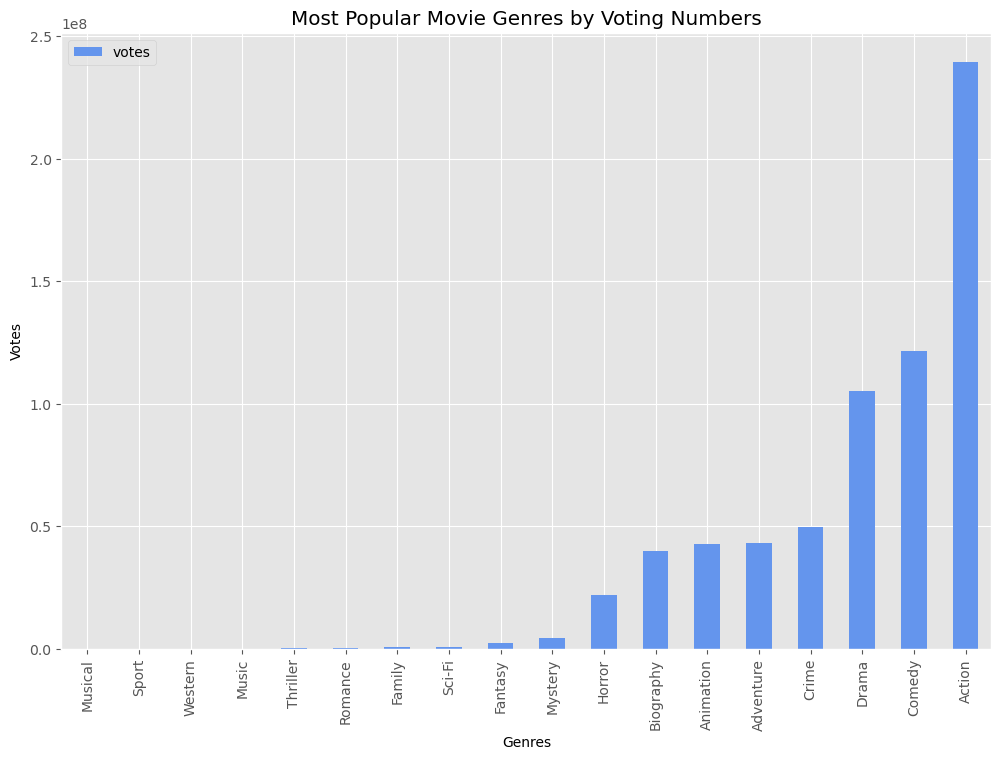

In [29]:
# finding most popular genre by vote

ax = df[['genre','votes']].groupby(['genre']).sum().sort_values(by=['votes'], ascending=True)\
.plot(kind='bar', title = 'Most Popular Movie Genres by Voting Numbers', color = 'cornflowerblue')

ax.set_xlabel('Genres') #labeling the x axis
ax.set_ylabel('Votes')

plt.show()

#### By the number of votes we can see how popular a certain genre is. From this case Action movies are far more popular from any other movie genres.

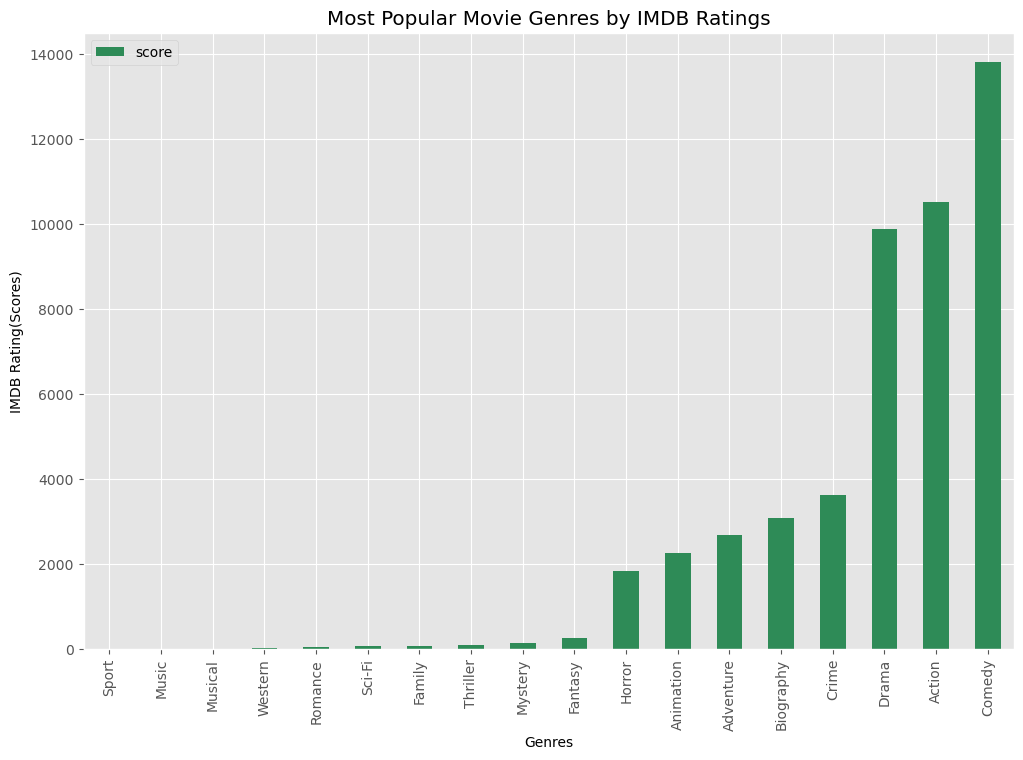

In [28]:
# finding most popular genre by score(IMDB Ratings)

ax = df[['genre','score']].groupby(['genre']).sum().sort_values(by=['score'], ascending=True)\
.plot(kind='bar', title = 'Most Popular Movie Genres by IMDB Ratings', color = 'seagreen')

ax.set_xlabel('Genres') #labeling the x axis
ax.set_ylabel('IMDB Rating(Scores)')

plt.show()

 #### In terms of IMDB user ratings, the action genre is not the leader. The honor goes to Comedy.

#### By the number of votes we can see how popular a certain genre is. From this case action movies are far more popular from any other movie genres.

In [25]:
# Top 15 Companies by Gross Revenue

Company_Gross_Revenue = df.groupby('company')[['gross']].sum()
Sorted_Gross_Revenue = Company_Gross_Revenue.sort_values('gross', ascending = False)[:15]
Sorted_Gross_Revenue

,gross
company,
Warner Bros.,56407679663
Universal Pictures,52592689431
Columbia Pictures,43008941346
Paramount Pictures,40572107956
Twentieth Century Fox,40257053857
Walt Disney Pictures,36327887792
New Line Cinema,19867862616
Marvel Studios,15065592411
DreamWorks Animation,11873612858


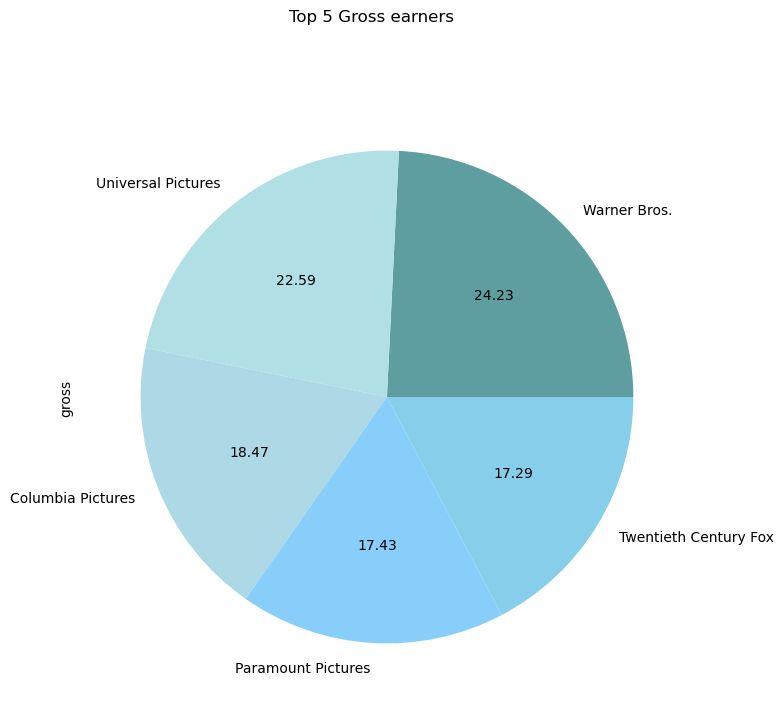

In [26]:
df1 = pd.DataFrame(Sorted_Gross_Revenue)
# Set custom colors
custom_colors = ['cadetblue', 'powderblue', 'lightblue', 'lightskyblue', 'skyblue']

df1.head().plot(kind = 'pie', autopct = '%.2f', subplots = True, legend = False, title = 'Top 5 Gross earners', colors=custom_colors)

plt.show()